In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

from numba import njit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

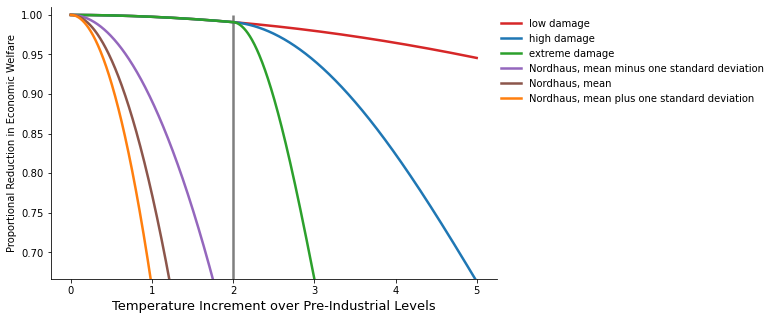

In [66]:
# Plot damage function
y_bar = 2.
γ_1 = 1.7675/10000
γ_2 = .0022*2
γ_3_low = 0
γ_3_high = .0394*2
γ_3_extreme = .3853*2
y_grid = np.linspace(0, 5, 1000)

damage_low = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_low/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_high = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_extreme = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar)*(y_grid-y_bar)**2

# Compute Nordhaus damage
psi_mean = .227
psi_std = .118
damage_nordhaus_mean = 1. - psi_mean*y_grid**2
damage_nordhaus_plus = 1. - (psi_mean + 1*psi_std) * y_grid**2
damage_nordhaus_minus = 1. - (psi_mean - 1*psi_std) * y_grid**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_low), linewidth=2.5, color='tab:red', label='low damage')
plt.plot(y_grid, np.exp(-damage_high), linewidth=2.5, color='tab:blue', label='high damage')
plt.plot(y_grid, np.exp(-damage_extreme), linewidth=2.5, color='tab:green', label='extreme damage')
plt.plot(y_grid, damage_nordhaus_minus, linewidth=2.5, color='tab:purple', label='Nordhaus, mean minus one standard deviation')
plt.plot(y_grid, damage_nordhaus_mean, linewidth=2.5, color='tab:brown', label='Nordhaus, mean')
plt.plot(y_grid, damage_nordhaus_plus, linewidth=2.5, color='tab:orange', label='Nordhaus, mean plus one standard deviation')

plt.ylim(2./3, 1.01)
plt.vlines(2., ymin=2./3, ymax=1., color='tab:grey', linewidth=2.5)
plt.xlabel('Temperature Increment over Pre-Industrial Levels', fontsize=13)
plt.ylabel('Proportional Reduction in Economic Welfare')
plt.legend(frameon=False, loc=(1., .63))
plt.savefig('../plots/damage_plot.pdf')

In [16]:
.0197*2

0.0394

In [ ]:


plt.plot(total_t, label='total', color='tab:red', linewidth=2.5)
plt.plot(temp_damage_t, label='temperature and damage uncertainty', color='darkorange', linewidth=2.5)
plt.plot(carb_damage_t, label='carbon and damage uncertainty', color='darkgreen', linewidth=2.5)
plt.plot(temp_carb_t, label='carbon and temperature uncertainty', color='navy', linewidth=2.5)
plt.xlabel('Years', fontsize=13)

plt.ylabel(r'Log difference (scaled by 100)')
plt.legend(frameon=False, loc='upper left')
plt.ylim(0, 80)
plt.savefig('../plots/standardized/uncertainty_two_partition.pdf')